# @CristiDatas - Proyecto EDA individual
## The Bridge, Data Science, agosto 2020.
# *Vivir en Madrid*.

<img src="../resources/images/housesbanner.png">


### Este archivo Jupyter Notebook contiene todas las funciones y llamadas a módulos que necesarios para realizar el proyecto.
Tanto la extracción, como el tratamiento y el análisis y visualización de datos están automatizados mediante diversas funciones, documentadas en este archivo y en sus correspondientes módulos.

Por ejemplo una misma función es capaz de generar todos los gráficos correspondientes a diversos ámbitos geográficos y a distintas operaciones (venta o alquiler) con sólo cambiar los parámetros y esa misma función muestra los gráficos por pantalla y también los guarda con nombres personalizados dentro de sus correspondientes carpetas, tanto en versión estática (.png) como dinámica e interactiva (.html).
### LOGROS:
Destacar que el bootcamp comienza el 15 de junio de 2020 y este proyecto lo realizo en una semana de agosto dee 2020, automatizando todo con funciones y módulos propios y usando la librería Plotly para crear gráficos interactivos sin haber recibido previamente ninguna noción al respecto.

In [13]:

#Añado al sys.path la ruta de la carpeta utils para que se puedan importar los módulos.

import sys
sys.path.append("../src/utils")


In [24]:
#!pip3 install plotly
#!pip3 install xlrd
#!pip3 install psutil
#!pip3 install orca
#!pip3 install kaleido


### Importación de bibliotecas y de módulos específicos para este proyecto.
Los módulos con las funciones se encuentran en la carpeta **utils** dentro de **src**.

In [22]:
import pandas as pd
import plotly
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#import kaleido
pd.options.display.float_format = '{:.2f}'.format
import folders_tb as fd
import mining_data_tb as mng
import visualization_tb as vsn

# EVOLUCIÓN VENTA

### Función hacer_df() de mining_tb
Recibe como parámetro un archivo de excel, hace un dataframe con sólo la primera hoja y sólo las 2 primeras columnas poniendo como índice la primera y, luego, mediante un for va recorriendo el resto de las hojas concatenando la segunda columna de cada una al primer dataframe. La función devuelve un dataframe con las fechas como índice y los precios de cada ámbito geográfico como columnas.


In [16]:
ventas_df=mng.hacer_df(archivo="../resources/data/informes_ventas.xlsx")

### Función hacer_float() de mining_tb
Toma como parámetro un dataframe, hace una copia, elimina los caracteres no numéricos, el 2 de m² y si hay alguna coma (para decimales) la cambia por un punto.  para después convertir las cadenas numéricas a float. La función devuelve un dataframe con valores tipo float.


In [17]:
ventas=mng.hacer_float(dataframe=ventas_df)

### Función seleccion_columnas() de mining_tb
Para seleccionar el ámbito (columnas) a analizar. La función toma como parámetros un dataframe y la posicion de dos columnas para seleccionar un rango. La función devuelve la lista de esas columnas selecionadas.


In [18]:
col_esp=mng.seleccion_columnas(dataframe=ventas,col1=0,col2=5)
col_mad=mng.seleccion_columnas(dataframe=ventas,col1=4,col2=26)

# Hago una lista con esas dos listas de columnas.

ventas_ambito=[col_esp,col_mad]

### Función evolucion() de visualization_tb
Para ver la evolución a lo largo de los años o meses del precio por m² de la vivienda en distintos ámbitos geográficos. La función toma como parámetros el dataframe a analizar la operación que se quiera analizar ("venta" o "alquiler") y dos listas: una con los rangos de columnas o ámbitos geográficos a analizar y otra con los años de inicio del análisis hasta la actualidad. En los gráficos aparece sombreado el período del estado de alarma (desde el 14 de marzo al 21 de junio de 2020). Primero muestra la imagen de cada gráfico en modo interactivo y después guarda cada gráfico con su propio nombre descriptivo en la carpeta correspondiente a la operación dentro de plots en resources.

In [ ]:
years=["2007","2019","2020"]

vsn.evolucion(dataframe=ventas,ambito=ventas_ambito,years=years,operacion="venta")        

### Función histo07() de visualization_tb
Para ver la frecuencia de precios desde 2007 en España, Barcelona provincia, Barcelona ciudad, Madrid provincia y Madrid ciudad. La función toma como parámetros el datafrme, el tipo de operacion (venta o alquiler).



In [ ]:
vsn.histo07(dataframe=ventas,operacion="venta",ambito=col_esp)

### Función reciente() de visualization_tb 
Compara el útimo valor del precio de la vivienda (julio de 2020) con el mínimo y máximo históricos desde 2007 o desde que se tengan datos. La función toma como parámetros el dataframe a analizar, la lista de listas de las columnas a comparar (ámbito geográfico) y el tipo de operación ("alquiler" o "venta").


In [ ]:
vsn.reciente(dataframe=ventas,ambito=ventas_ambito,operacion="venta")

# EVOLUCIÓN ALQUILER
### Son las mismas funciones que venta cambiando parámetros

In [11]:
# Función hacer_df() de mining_tb que recibe como parámetro un archivo de excel, hace un dataframe con sólo la primera hoja y sólo las 2 primeras columnas poniendo como índice la primera y, luego, mediante un for va recorriendo el resto de las hojas concatenando la segunda columna de cada una al primer dataframe. Con esto tenemos un dataframe con las fechas como índice y los precios de cada ámbito geográfico como columnas.

alquiler_df=mng.hacer_df(archivo="../resources/data/informes_alquiler.xlsx")

In [11]:
# Función hacer_float() de mining_tb que toma como parámetro un dataframe, hace una copia, elimina los caracteres no numéricos, el 2 de m² y si hay alguna coma (para decimales) la cambia por un punto.  para después convertir las cadenas numéricas a float. La función devuelve un dataframe con valores tipo float.

alquiler=mng.hacer_float(dataframe=alquiler_df)

In [ ]:
# Necesito una lista con las listas de las columnas (ámbito geográfico) a analizar. En este caso, como son las mismas que las que usé con las ventas, simplemente creo una nueva variable para el alquiler con los mismos valores.

alquiler_ambito=ventas_ambito.copy()

In [ ]:
# Función evolucion() de visualization_tb para ver la evolución a lo largo de los años o meses del precio por m² de la vivienda en distintos ámbitos geográficos. La función toma como parámetros el dataframe a analizar, la operación que se quiera analizar ("venta" o "alquiler") y dos listas: una con los rangos de columnas o ámbitos geográficos a analizar y otra con los años de inicio del análisis hasta la actualidad. En los gráficos aparece sombreado el período del estado de alarma (desde el 14 de marzo al 21 de junio de 2020). Primero muestra la imagen de cada gráfico en modo interactivo y después guarda cada gráfico con su propio nombre descriptivo en la carpeta correspondiente a la operación dentro de plots en resources.

years=["2007","2019","2020"]

vsn.evolucion(dataframe=alquiler,ambito=alquiler_ambito,years=years,operacion="alquiler")

In [ ]:
# Función histo07() de visualization_tb para ver la frecuencia de precios desde 2007 en España, Barcelona provincia, Barcelona ciudad, Madrid provincia y Madrid ciudad. La función toma como parámetros el datafrme el tipo de operacion (venta o alquiler) y el ámbito geográfico y devuelve varios histogramas interactivos de 5 bins que guarda en la carpera correspondiente a la operación.

vsn.histo07(dataframe=alquiler,operacion="alquiler",ambito=col_esp)

In [ ]:
# Función reciente() de visualization_tb que compara el útimo valor del precio de la vivienda (julio de 2020) con el mínimo y máximo históricos desde 2007 o desde que se tengan datos. La función toma como parámetros el dataframe a analizar, la lista de listas de las columnas a comparar (ámbito geográfico) y el tipo de operación ("alquiler" o "venta").

vsn.reciente(dataframe=alquiler,ambito=alquiler_ambito,operacion="alquiler")

In [ ]:
# Descubrimos que el máximo desde 2007 en el precio del alquiler (tanto en España como em Barcelona y Madrid) se dio precisamente en mayo de 2020, en pleno estado de alarma.

alquiler[col_esp][alquiler[col_esp]==alquiler[col_esp].max()].dropna()

# PRECIO VENTA ACTUAL EN TODA ESPAÑA (JULIO 2020)
## ANÁLISIS DE AUTONOMÍAS Y CIUDADES

In [ ]:
# Abrimos el archivo excel y lo convertimos en dataframe.
v_autonom=pd.read_excel("../resources/data/ventas_jul20.xlsx",sheet_name=0)

### Función hacer_float() de mining_tb
Toma como parámetro un dataframe, hace una copia, elimina los caracteres no numéricos, el 2 de m² y si hay alguna coma (para decimales) la cambia por un punto.  para después convertir las cadenas numéricas a float. La función devuelve un dataframe con valores tipo float.



In [ ]:
v_autonom["JUL_20"]=mng.hacer_float(dataframe=v_autonom.loc[:,["JUL_20"]])

### Función act_pie() de visualization_tb
Para ver el estado reciente de los precios en distintos ámbitos geográficos. La función toma como parámetros el dataframe de precios recientes, el ámbito geográfico (AUTONOMÍA O CIUDADES) y la operación (venta o alquiler) y devuelve un gráfico pie interactivo con la distribución de los valores correspondientes, primero lo mustra por pantalla y luego lo guarda en la carpeta correspondiente a su operación.

In [ ]:
vsn.act_pie(dataframe=v_autonom, ambito="AUTONOMIA", operacion="venta")

### Función hist_v_2020() de visualization_tb
Para ver la distribución de los precios según distintos ámbitos geográficos. La función toma como parámetro en dataframe, la operación (venta o alquiler) y el ámbito (AUTONOMÍA o CIUDADES) y devuelve un histograma interactivo de 5 bins que guarda en la carpera correspondiente a la operación.

In [ ]:
vsn.hist_v_2020(dataframe=v_autonom,ambito="AUTONOMIA",operacion="venta")


In [12]:
# Abrimos el archivo excel y lo convertimos en dataframe

v_ciud=pd.read_excel("../resources/data/ventas_jul20.xlsx",sheet_name=1)

### Función hacer_float() de mining_tb
Toma como parámetro un dataframe, hace una copia, elimina los caracteres no numéricos, el 2 de m² y si hay alguna coma (para decimales) la cambia por un punto.  para después convertir las cadenas numéricas a float. La función devuelve un dataframe con valores tipo float.

In [ ]:
v_ciud["JUL_20"]=mng.hacer_float(dataframe=v_ciud.loc[:,["JUL_20"]])

### Función act_pie() de visualization_tb
Para ver el estado reciente de los precios en distintos ámbitos geográficos. La función toma como parámetros el dataframe de precios recientes, el ámbito geográfico (AUTONOMÍA O CIUDADES) y la operación (venta o alquiler) y devuelve un gráfico pie interactivo con la distribución de los valores correspondientes, primero lo mustra por pantalla y luego lo guarda en la carpeta correspondiente a su operación.

In [ ]:
vsn.act_pie(dataframe=v_ciud, ambito="CIUDAD", operacion="venta")

### Función hist_v_2020() de visualization_tb
Para ver la distribución de los precios según distintos ámbitos geográficos. La función toma como parámetro en dataframe, la operación (venta o alquiler) y el ámbito (AUTONOMÍA o CIUDADES) y devuelve un histograma interactivo de 5 bins que guarda en la carpera correspondiente a la operación.

In [ ]:
vsn.hist_v_2020(dataframe=v_ciud,ambito="CIUDAD",operacion="venta")

# PRECIO ALQUILER ACTUAL EN TODA ESPAÑA (JULIO 2020)
## ANÁLISIS DE AUTONOMÍAS Y CIUDADES
### Son las mismas funciones que venta cambiando parámetros

In [ ]:
# Abrimos el archivo excel y lo convertimos en dataframe
a_autonom=pd.read_excel("../resources/data/alquiler_jul20.xlsx",sheet_name=0)

In [ ]:
# Función hacer_float() de mining_tb que toma como parámetro un dataframe, hace una copia, elimina los caracteres no numéricos, el 2 de m² y si hay alguna coma (para decimales) la cambia por un punto.  para después convertir las cadenas numéricas a float. La función devuelve un dataframe con valores tipo float.

a_autonom["JUL_20"]=mng.hacer_float(dataframe=a_autonom.loc[:,["JUL_20"]])

In [ ]:
# Función act_pie() de visualization_tb para ver el estado reciente de los precios en distintos ámbitos geográficos. La función toma como parámetros el dataframe de precios recientes, el ámbito geográfico (AUTONOMÍA O CIUDADES) y la operación (venta o alquiler) y devuelve un gráfico pie interactivo con la distribución de los valores correspondientes, primero lo mustra por pantalla y luego lo guarda en la carpeta correspondiente a su operación.

vsn.act_pie(dataframe=a_autonom, ambito="AUTONOMIA", operacion="alquiler")

In [ ]:
# Función hist_v_2020() de visualization_tb para ver la distribución de los precios según distintos ámbitos geográficos. La función toma como parámetro en dataframe, la operación (venta o alquiler) y el ámbito (AUTONOMÍA o CIUDADES) y devuelve un histograma interactivo de 5 bins que guarda en la carpera correspondiente a la operación.

vsn.hist_v_2020(dataframe=a_autonom,ambito="AUTONOMIA",operacion="alquiler")

In [ ]:
# Abrimos el archivo excel y lo convertimos en dataframe

a_ciud=pd.read_excel("../resources/data/alquiler_jul20.xlsx",sheet_name=1)

In [ ]:
# Función hacer_float() de mining_tb que toma como parámetro un dataframe, hace una copia, elimina los caracteres no numéricos, el 2 de m² y si hay alguna coma (para decimales) la cambia por un punto.  para después convertir las cadenas numéricas a float. La función devuelve un dataframe con valores tipo float.

a_ciud["JUL_20"]=mng.hacer_float(dataframe=a_ciud.loc[:,["JUL_20"]])

In [ ]:
# Función act_pie() de visualization_tb para ver el estado reciente de los precios en distintos ámbitos geográficos. La función toma como parámetros el dataframe de precios recientes, el ámbito geográfico (AUTONOMÍA O CIUDADES) y la operación (venta o alquiler) y devuelve un gráfico pie interactivo con la distribución de los valores correspondientes, primero lo mustra por pantalla y luego lo guarda en la carpeta correspondiente a su operación.

vsn.act_pie(dataframe=a_ciud, ambito="CIUDAD", operacion="alquiler")

In [ ]:
# Función hist_v_2020() de visualization_tb para ver la distribución de los precios según distintos ámbitos geográficos. La función toma como parámetro en dataframe, la operación (venta o alquiler) y el ámbito (AUTONOMÍA o CIUDADES) y devuelve un histograma interactivo de 5 bins que guarda en la carpera correspondiente a la operación.

vsn.hist_v_2020(dataframe=a_ciud,ambito="CIUDAD",operacion="alquiler")

In [ ]:
"""
DATOS MUY INTERESANTES QUE SE PODRÍAN AÑADIR CUANDO SEAN ACTUALIZADOS:

. HIPOTECAS INE: sólo hay datos hasta el primer trimestre.
. AIRBNB: sólo hay datos reales hasta marzo.
. Rentas medias por distritos.

"""

# TIEMPO DEDICADO A ESTE ESTUDIO

### Función study_pie(), de visualization_tb
Presenta un gráfico circular con la distribución de los 7 días de los que he dispuesto (por circunstancias personales) para hacer este estudio. El gráfico presenta el valor y el porcentaje y la función primero muestra el gráfico interactivo en pantalla y luego lo guarda en la carpeta resources tanto en .png como en .html.

In [4]:

vsn.study_pie()

# MATRIZ DE CORRELACIÓN

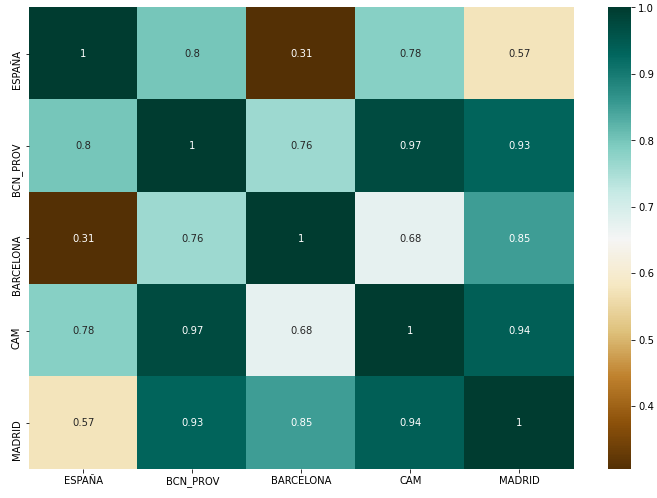

In [7]:
# Función corr_esp() de visualization_tb que recibe como un dataframe y las columnas referentes a España, Barcelona Y Madrid y devuelve la matriz de correlación de sus diferentes columnas. En este caso, sólo sirve para ver cómo es de parecida o diferente la evolución de los precios en Barcelona, Madrid y España.

vsn.corr_esp(dataframe=ventas,col=col_esp)

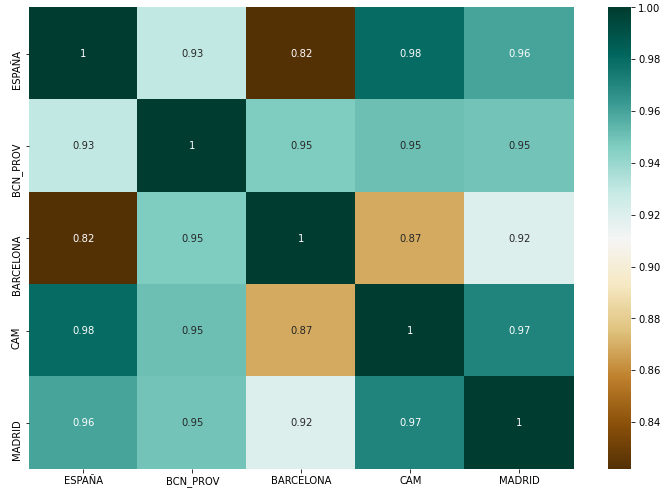

In [12]:
# Función corr_esp() de visualization_tb analizando el alquiler.
vsn.corr_esp(dataframe=alquiler,col=col_esp)

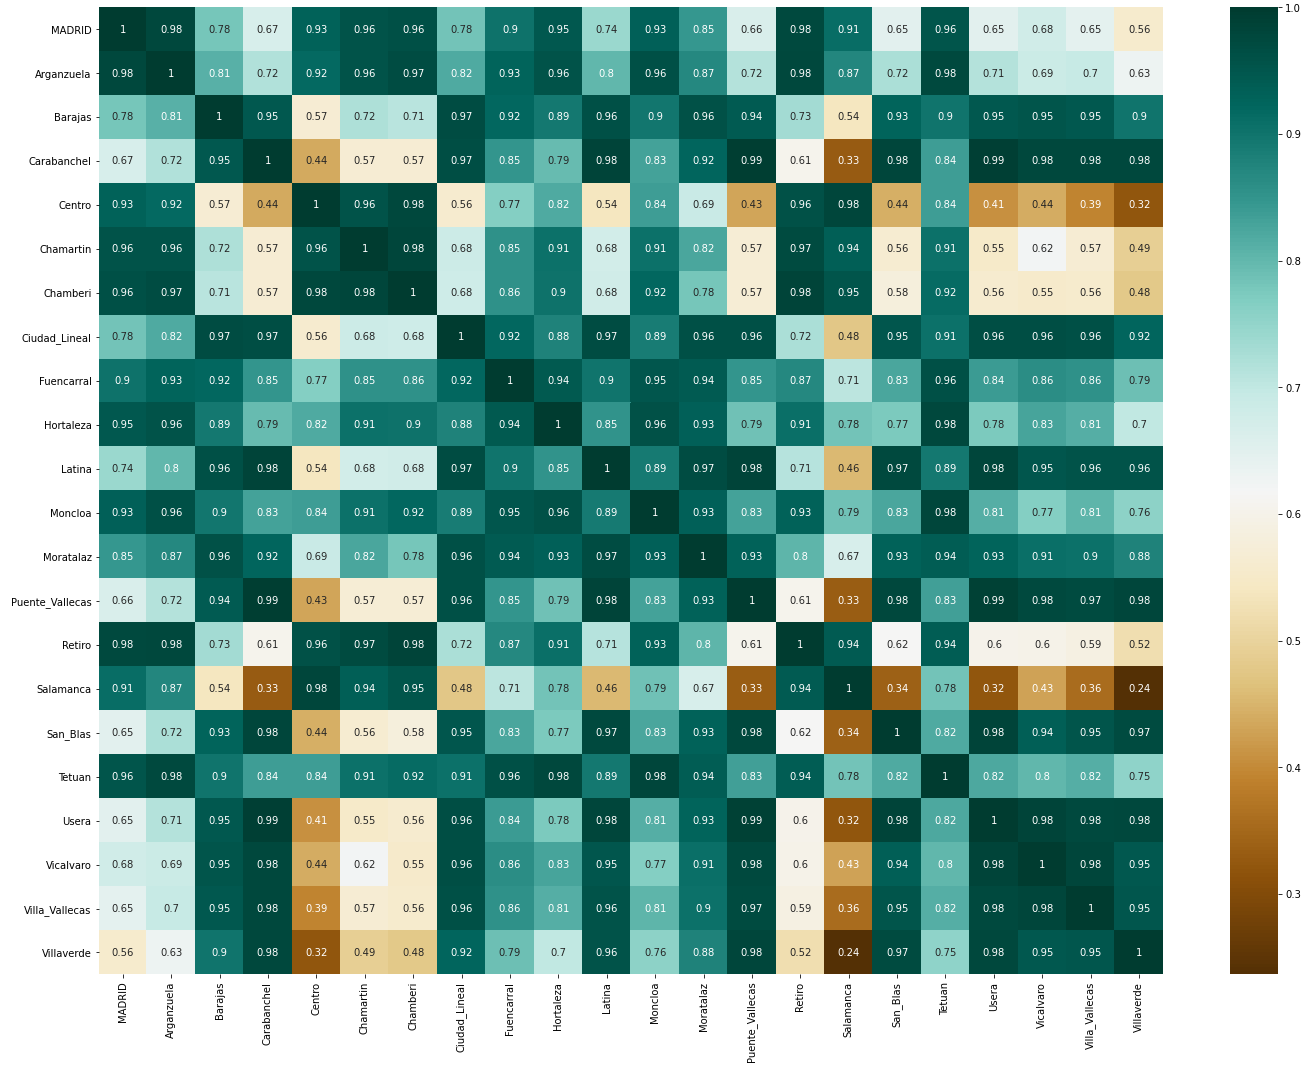

In [9]:
# Función corr_mad() de visualization_tb que recibe como un dataframe y las columnas referentes a los distritos de Madrid  y devuelve la matriz de correlación de sus diferentes columnas. En este caso, sólo sirve para ver qué distritos de Madrid tienen una evolución de precios más parecida o más diferente.

vsn.corr_mad(dataframe=ventas,col=col_mad)

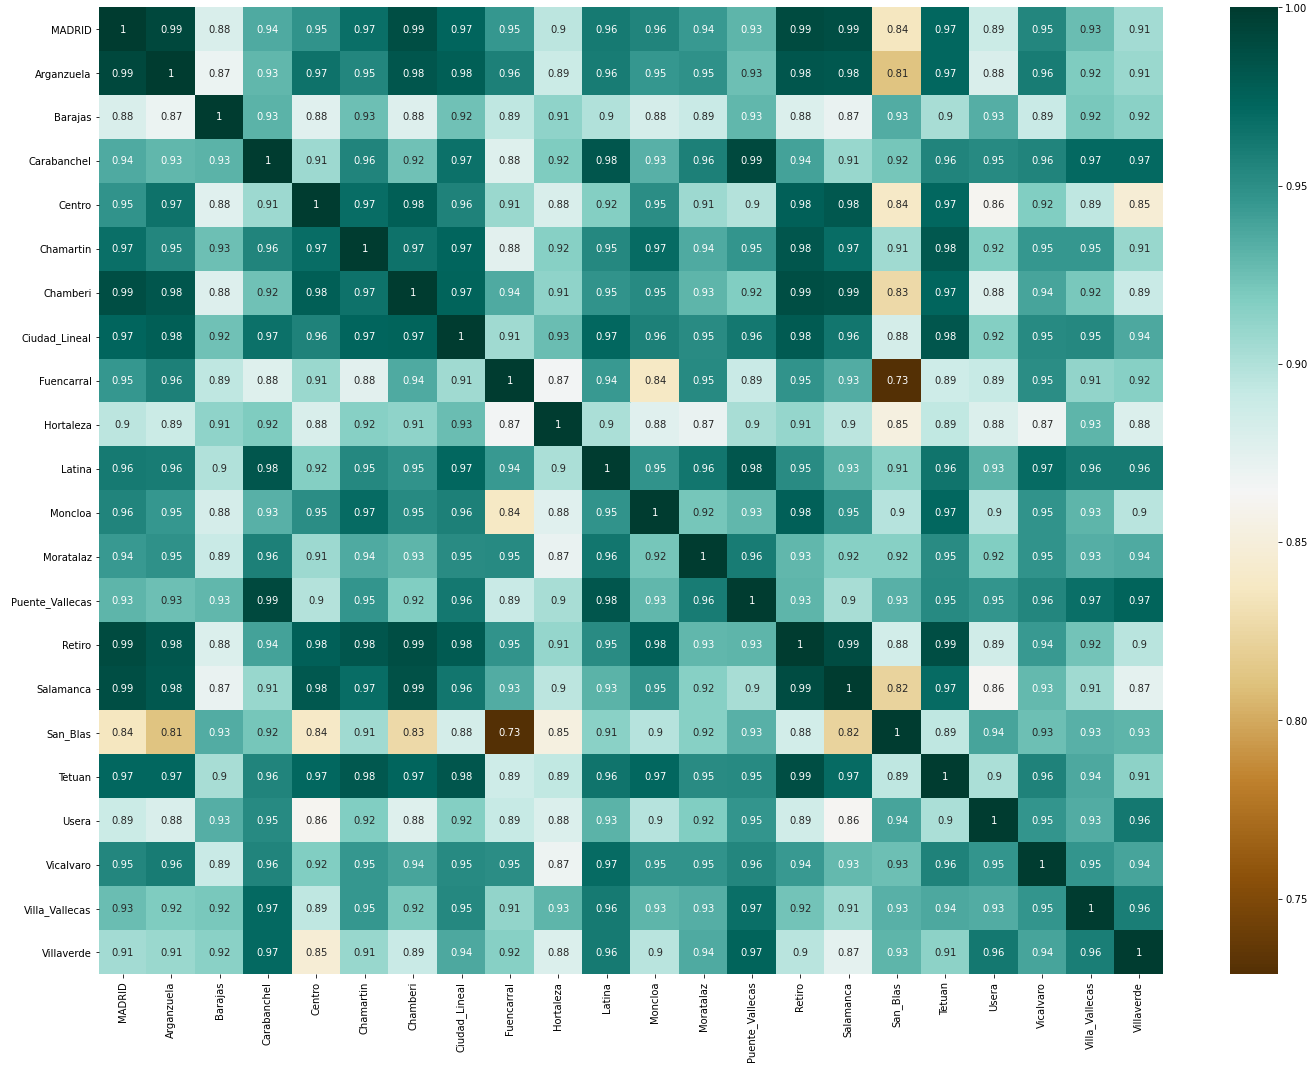

In [13]:
# Función corr_mad() de visualization_tb analizando el alquiler.
vsn.corr_mad(dataframe=alquiler,col=col_mad)

# JSON CON DATOS LIMPIOS PARA API

In [9]:
ventas.to_json("..\\resources\\json\\output\\datos_limpios.json")